<a href="https://colab.research.google.com/github/GaganiKulathilaka/Customer-Subscription-Prediction/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook will be used to run the ML algorithms**

Import the necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

Load the training and testing datasets into the notebook

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv", delimiter=';')
test_data = pd.read_csv("/content/drive/MyDrive/bank-additional.csv", delimiter=';')

Check if the column names and order matches between the two datasets

In [ ]:
test_data = test_data[train_data.columns]

Print the non-processed training dataset

In [ ]:
print("Train Data:")
df = train_data
df

Train Data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Print the non-processed testing dataset

In [ ]:
print("Test Data:")
df = test_data
df

Test Data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


Check for the null values in the dataset

In [ ]:
# Check for missing values
print(train_data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Even though there aren't any null values in the dataset, upon careful observation we can see data with the value 'unknown' which should be handled.

Prior to handling that we need to know the overall 'yes' proportion for target variable 'y'.

In [ ]:
# Calculate overall 'yes' rate
overall_yes_rate = train_data['y'].value_counts(normalize=True)['yes'] * 100
print(f"Overall 'yes' rate in the dataset: {overall_yes_rate:.2f}%")

Overall 'yes' rate in the dataset: 11.27%


In [ ]:
# Columns with 'unknown' values
unknown_columns = train_data.isin(['unknown']).sum()[train_data.isin(['unknown']).sum() > 0].index
print("\nColumns with 'unknown' values:\n", unknown_columns)


Columns with 'unknown' values:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')


Delete the columns with 'yes' proportion which varies from the overall 'yes' percentage.

Impute the columns with the 'yes' proportion similar to or slightly different from the overall 'yes' rate as those atributes might have hidden relationships with the target variable 'y'.

In [ ]:
# Impute columns with the mode
columns_to_impute = ['job', 'housing', 'loan']
for column in columns_to_impute:
    mode = train_data[column].mode()[0]
    train_data[column] = train_data[column].replace('unknown', mode)

# Drop columns with minimal impact
columns_to_drop = ['marital', 'education', 'default']
train_data = train_data.drop(columns=columns_to_drop)

# Verify the updated dataset
print("Remaining columns after imputation and deletion:", train_data.columns)

Remaining columns after imputation and deletion: Index(['age', 'job', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
# Check the updated data
print("Updated Data Summary:")
print(train_data.isin(['unknown']).sum())

Updated Data Summary:
age               0
job               0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


**Feature Selection**

Since the values of the duration column is unavailable until after the outcome it cannot be used in a real-time predictive model.

To address this issue the duration column was dropped from the dataset.

In [ ]:
# Drop 'duration' column (not predictive in real-time settings)
train_data = train_data.drop(columns=['duration'])

Categorical and numerical features were separated for tailored preprocessing

In [ ]:
# Display the data types of each column
print("Data Types of Each Column:")
print(train_data.dtypes)

Data Types of Each Column:
age                 int64
job                object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [ ]:
# Split attributes into categorical and numerical
categorical_features = [
    'job', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome'
]
numerical_features = [
    'age', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

The target column 'y' was encoded into binary values (yes = 1, no = 0).

In [ ]:
# Encode target variable 'y' to binary
train_data['y'] = train_data['y'].map({'yes': 1, 'no': 0})
test_data['y'] = test_data['y'].map({'yes': 1, 'no': 0})

Generating a correlation heatmap to understand relationships between numerical features and the target variable.

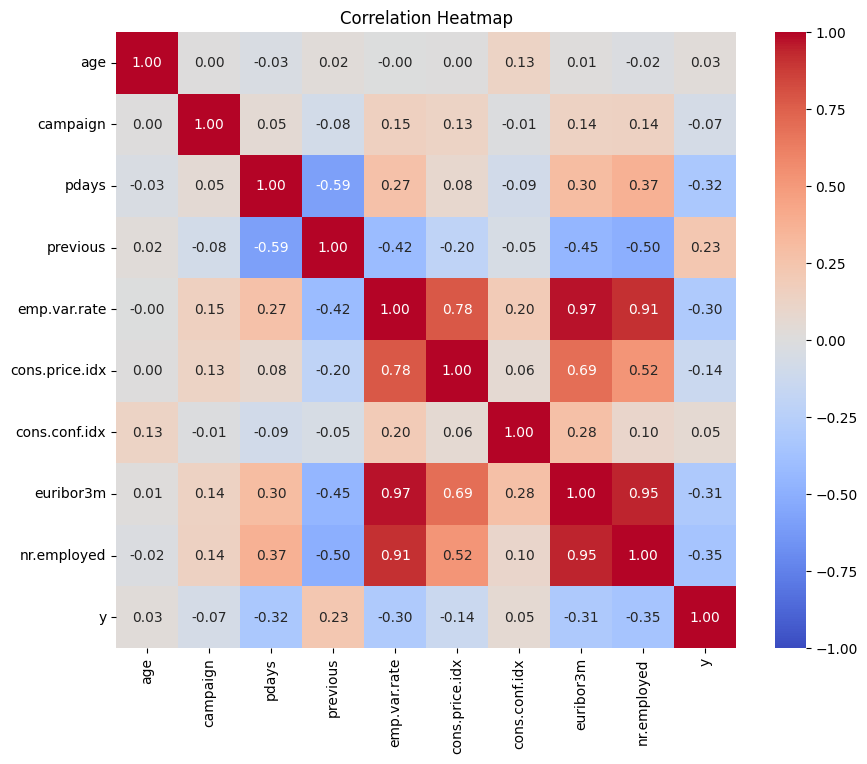

In [ ]:
# Compute the correlation matrix
correlations = train_data[numerical_features + ['y']].corr()

# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

To determine the relationship between a continuous variable and a binary variable, correlation analysis is performed.

In [ ]:
# Correlation Analysis
print("\nCorrelation Analysis for Numerical Attributes:")
correlations = train_data[numerical_features + ['y']].corr()
print(correlations['y'].sort_values(ascending=False))


Correlation Analysis for Numerical Attributes:
y                 1.000000
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64


Chi-square tests were performed on categorical attributes to evaluate their significance concerning the target.

In [ ]:
print("Chi-Square Test for Categorical Attributes:")
for col in categorical_features:
    contingency_table = pd.crosstab(train_data[col], train_data['y'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{col}: p-value = {p:.4f}")
    if p > 0.05:
        print(f"  -> '{col}' may not be significantly related to 'y'.")

Chi-Square Test for Categorical Attributes:
job: p-value = 0.0000
housing: p-value = 0.0255
loan: p-value = 0.3763
  -> 'loan' may not be significantly related to 'y'.
contact: p-value = 0.0000
month: p-value = 0.0000
day_of_week: p-value = 0.0000
poutcome: p-value = 0.0000


Features with very low correlation should be removed. *(* *|correlation| < 0.05*)

Based on the correlation analysis performed 'age' column should be removed.


Features that have a *(p-value > 0.05)* might not be strongly correlated with y and should be eliminated.

Based on the chi-square test 'housing' and 'loan' should be removed.

In [ ]:
# Features to remove based on analysis
features_to_remove = [ 'housing', 'loan', 'age']

# Drop the selected features from the dataset
train_data = train_data.drop(columns=features_to_remove)

# Check the updated dataset
print("Updated Dataset Columns:")
print(train_data.columns)

Updated Dataset Columns:
Index(['job', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
df = train_data
df

,job,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,housemaid,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,services,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,services,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,admin.,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,services,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,blue-collar,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,retired,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,technician,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


One Hot Encoding was used to generate binary columns for every categorical value

In [ ]:
# Identify categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# One-Hot Encoding for Categorical Variables
train_data = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

# Align train and test datasets (to ensure same features after encoding)
train_data, test_data = train_data.align(test_data, join='inner', axis=1)


In [ ]:
X_train = train_data.drop(columns=["y"]) # Feature set for the training data
y_train = train_data["y"] # Extract the target variable from the training data

X_test = test_data.drop(columns=["y"]) # Feature set for the testing data
y_test = test_data["y"]  # Extract the target variable from the testing data

To ensures that all features contribute equally to the model training process, Min-Max Scaling was used to scale data to a fixed range, between 0 and 1.

In [ ]:
# Min-Max Scaling for Numerical Features
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])


Ensure that both the training and testing datasets have the same number of features after preprocessing (encoding and scaling)

In [ ]:
print(f"Number of features in X_train: {X_train.shape[1]}")
print(f"Number of features in X_test: {X_test.shape[1]}")

Number of features in X_train: 34
Number of features in X_test: 34


Based on the above outcome we can concloude that after pre-processing, both the training and testing datasets have the same number of features.

In [ ]:
# Display the datasets after encoding and scaling
print("Train Dataset After One-Hot Encoding and Scaling:")
X_train

Train Dataset After One-Hot Encoding and Scaling:


,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
print("\nTest Dataset After One-Hot Encoding and Scaling:")
X_test


Test Dataset After One-Hot Encoding and Scaling:


,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.018182,1.0,0.000000,0.333333,0.269680,0.192469,0.153933,0.512287,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.054545,1.0,0.000000,0.937500,0.698753,0.602510,0.956926,0.859735,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,1.0,0.000000,1.000000,0.882307,0.376569,0.981183,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.036364,1.0,0.000000,1.000000,0.882307,0.376569,0.980503,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,1.0,0.000000,0.687500,0.389322,0.368201,0.806393,0.877883,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.980277,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4115,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.980503,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4116,0.018182,1.0,0.142857,0.333333,0.269680,0.192469,0.163228,0.512287,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4117,0.000000,1.0,0.000000,1.000000,0.484412,0.615063,0.982090,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Final data frame can be viewed as above.

**Machine Learning Algorithms**

1. Nueral Network Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the neural network model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16), # Three hidden layers with decreasing neurons
    activation='relu',               # ReLU activation function
    solver='adam',                   # Adam optimizer
    max_iter=500,                    # Maximum iterations for convergence
    random_state=42,                 # Ensures reproducibility
    verbose=False                    # Print training progress
)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9296

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3668
           1       0.86      0.43      0.57       451

    accuracy                           0.93      4119
   macro avg       0.90      0.71      0.77      4119
weighted avg       0.93      0.93      0.92      4119



2. Random Forest Classification Model

In [ ]:
# Define the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=None,         # Allow trees to grow fully unless overfitting occurs
    random_state=42,        # Ensure reproducibility
    n_jobs=-1               # Use all available CPU cores for faster computation
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9468

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3668
           1       0.93      0.56      0.70       451

    accuracy                           0.95      4119
   macro avg       0.94      0.78      0.83      4119
weighted avg       0.95      0.95      0.94      4119



After analysing the above two models we can conclude the followings :

1. In general, class zero has superior precision, recall, and f1-score than class one.

2. Despite this, it shows a balance in performance across classes because the weighted average and the macro average are rather similar.

Therefore, it may be concluded that the model is neither overfitting nor underfitting.

**Further Improvements**

Hyperparameter Tuning is one of the highly effective and essential strategy for improving model performance.

Hyperparameter Tuning for Neural Network Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define a limited hyperparameter space for quick tuning
param_dist = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32)],  # Small configurations for fast training
    'activation': ['relu', 'tanh'],                  # Popular activation functions
    'solver': ['adam'],                              # Efficient optimizer
    'alpha': [0.0001, 0.001, 0.01],                  # Regularization parameter
    'batch_size': [32, 64, 128],                     # Moderate batch sizes
    'learning_rate': ['constant', 'adaptive'],       # Learning rate schedules
}

# Define the base neural network model
mlp_model = MLPClassifier(
    max_iter=200,               # Faster convergence with fewer iterations
    random_state=42,            # Ensure reproducibility
    verbose=False               # Suppress training progress
)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=mlp_model,
    param_distributions=param_dist,
    n_iter=10,                  # Limit the number of configurations to test
    cv=3,                       # 3-fold cross-validation
    scoring='accuracy',         # Optimize for accuracy
    n_jobs=-1,                  # Utilize all available CPUs
    random_state=42,            # Ensure reproducibility
    verbose=2                   # Print progress during tuning
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Use the best model for predictions
best_mlp_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_mlp_model.predict(X_test)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (64, 32), 'batch_size': 32, 'alpha': 0.001, 'activation': 'tanh'}
Best Cross-Validation Accuracy: 0.3949331677870695

Test Accuracy: 0.9090

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3668
           1       0.70      0.30      0.42       451

    accuracy                           0.91      4119
   macro avg       0.81      0.64      0.68      4119
weighted avg       0.90      0.91      0.89      4119



Hyperparameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define a smaller hyperparameter space
param_dist = {
    'n_estimators': randint(50, 150),  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of trees
    'min_samples_split': randint(2, 10),  # Minimum samples for split
    'min_samples_leaf': randint(1, 4),  # Minimum samples at leaf node
    'max_features': ['sqrt', 'log2'],  # Feature selection for split
    'bootstrap': [True, False]  # Whether to bootstrap samples
}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Metric for evaluation
    n_jobs=-1,  # Use all CPU cores
    verbose=2,
    random_state=42
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Display the best parameters and cross-validation score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Train the final model with the best parameters
best_rf_model = random_search.best_estimator_

# Evaluate on the test set
y_pred = best_rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 113}
Best Cross-Validation Score: 0.39510313140017184
Test Accuracy: 0.9102

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3668
           1       0.74      0.28      0.40       451

    accuracy                           0.91      4119
   macro avg       0.83      0.63      0.68      4119
weighted avg       0.90      0.91      0.89      4119




When comparing the accuracy of my neural network and hyperparameter-tuned neural network models, the original neural network achieved an accuracy of 0.9296, while the tuned model only reached 0.9090

Similarly, for the random forest classifier, the original model attained an accuracy of 0.9468, whereas the tuned version achieved 0.9102.

Since the default models consistently perform above 90% accuracy, it may be more effective to avoid hyperparameter tuning in this case.

**AUC-ROC Curve**

This curve plots the true positive value against the false positive value.

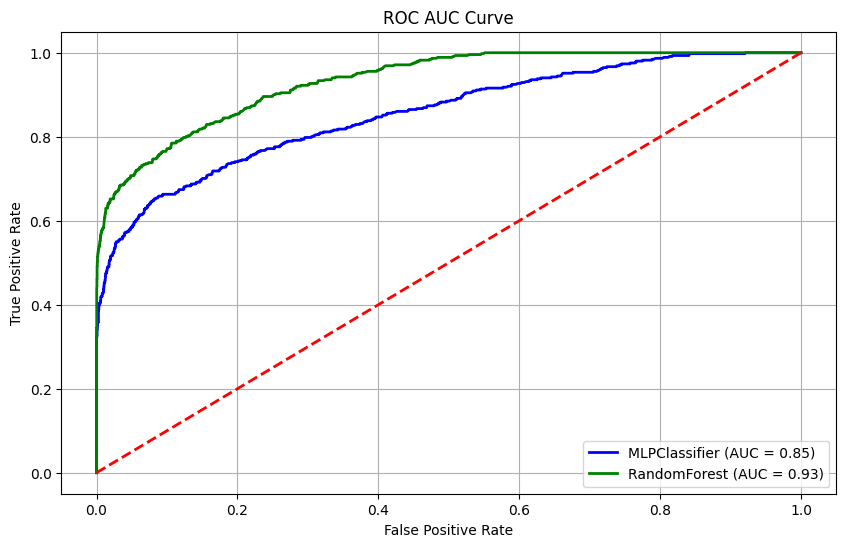

In [ ]:
# Define the MLPClassifier and RandomForestClassifier models
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train the models
mlp_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Generate ROC AUC Curve
from sklearn.metrics import roc_curve, auc

# MLPClassifier ROC AUC
mlp_y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_y_pred_proba)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# RandomForestClassifier ROC AUC
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_pred_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_mlp, tpr_mlp, label=f"MLPClassifier (AUC = {roc_auc_mlp:.2f})", lw=2, color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC = {roc_auc_rf:.2f})", lw=2, color='green')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

plt.title('ROC AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Ranks of the models based on the plot :



1.   Random Forest Classification
2.   Neural Network

